<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/LSTM_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
# !pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [3]:
from google.colab import files
uploaded = files.upload()

Saving updated-sbl-data.csv to updated-sbl-data.csv


In [4]:
df = pd.read_csv("updated-sbl-data.csv")
df.head()

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"
1,2022-06-23,303.60,312.00,299.00,310.00,"21,288,720.60"
2,2022-06-22,320.00,323.00,309.20,309.70,"11,483,008.50"
3,2022-06-21,309.00,323.30,305.00,323.30,"12,249,030.40"
4,2022-06-20,309.00,309.90,304.00,306.00,"14,048,955.00"


In [5]:
# df.drop(' S.N',axis=1, inplace=True)

In [6]:
# df.drop(['% Change','Qty'],axis=1, inplace=True)

In [ ]:
# df.to_csv("updated-sbl-data.csv", index=False)

**Exploring the dataset**

In [69]:
m = df.set_index("Date",drop=True)
m = m[["High","Low"]]
m

,High,Low
Date,,
2022-06-24,310.00,298.20
2022-06-23,312.00,299.00
2022-06-22,323.00,309.20
2022-06-21,323.30,305.00
2022-06-20,309.90,304.00
...,...,...
2013-04-17,304.00,300.00
2013-04-16,306.00,301.00
2013-04-15,309.00,305.00


In [70]:
df["Low"] = df["Low"].str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

In [71]:
df["High"] = df["High"].str.replace(",","")
high = df["High"].apply(lambda x: float(x))

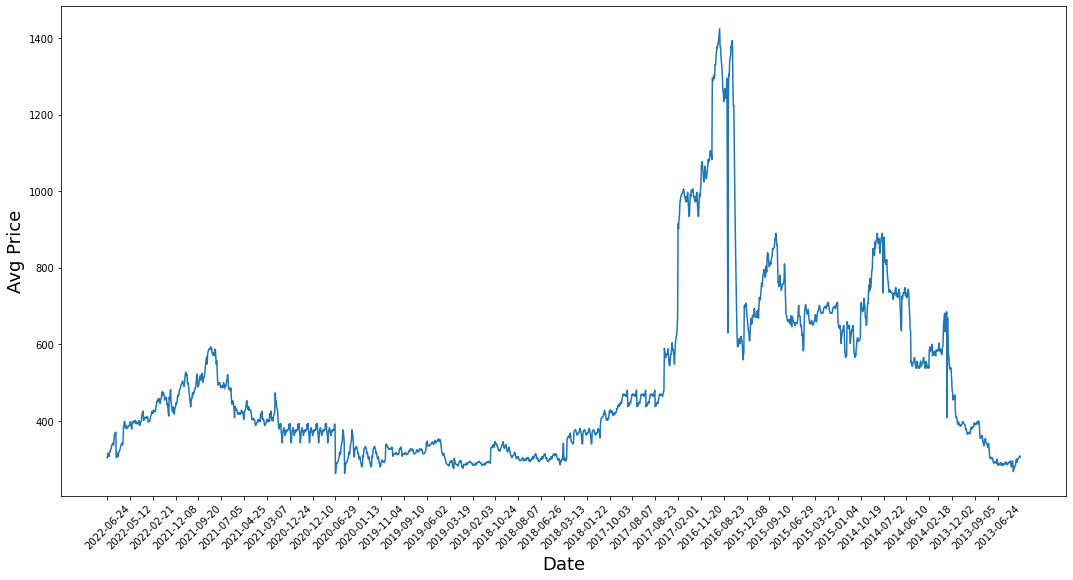

In [72]:
#Data Visualization
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(low + high)/2.0)
plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Avg Price',fontsize=18)
plt.show()

In [73]:
open_df = df["Open"].values
open_df = open_df.reshape(-1,1)
open_df.shape

(2000, 1)

In [74]:
open_df

array([['305.00'],
       ['303.60'],
       ['320.00'],
       ...,
       ['308.00'],
       ['306.00'],
       ['305.00']], dtype=object)

In [75]:
train = np.array(open_df[:int(open_df.shape[0]*0.8)])
testing = np.array(open_df[int(open_df.shape[0]*0.8)-50:])

In [76]:
train.shape, testing.shape

((1600, 1), (450, 1))

In [77]:
## Preprocessing the dataset
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
train[:5]

array([[0.02714536],
       [0.02591944],
       [0.04028021],
       [0.03064799],
       [0.03064799]])

In [78]:
test = scaler.transform(testing)
test[:5]

array([[0.35989492],
       [0.33975482],
       [0.34238179],
       [0.34588441],
       [0.35901926]])

In [90]:
def dataset(df):
  x=[]
  y=[]

  for i in range(50,df.shape[0]):
    x.append(df[i-50:i,0])
    y.append(df[i,0])

  x=np.array(x)
  y=np.array(y)

  return x,y

In [95]:
X_train, y_train = dataset(train)
X_train

array([[0.02714536, 0.02591944, 0.04028021, ..., 0.09605954, 0.10420315,
        0.1033275 ],
       [0.02591944, 0.04028021, 0.03064799, ..., 0.10420315, 0.1033275 ,
        0.11033275],
       [0.04028021, 0.03064799, 0.03064799, ..., 0.1033275 , 0.11033275,
        0.10595447],
       ...,
       [0.33625219, 0.33537653, 0.34676007, ..., 0.37302977, 0.37478109,
        0.37828371],
       [0.33537653, 0.34676007, 0.35989492, ..., 0.37478109, 0.37828371,
        0.37302977],
       [0.34676007, 0.35989492, 0.33975482, ..., 0.37828371, 0.37302977,
        0.39054291]])

In [96]:
X_train[:1]

array([[0.02714536, 0.02591944, 0.04028021, 0.03064799, 0.03064799,
        0.04028021, 0.03677758, 0.03607706, 0.05297723, 0.05166375,
        0.06015762, 0.06190893, 0.06190893, 0.05779335, 0.06217163,
        0.07530648, 0.08607706, 0.08756567, 0.08581436, 0.08406305,
        0.02714536, 0.02591944, 0.04028021, 0.03064799, 0.03064799,
        0.04028021, 0.03677758, 0.03607706, 0.05297723, 0.05166375,
        0.06015762, 0.06190893, 0.06190893, 0.05779335, 0.06217163,
        0.07530648, 0.10569177, 0.10507881, 0.11549912, 0.10595447,
        0.10122592, 0.0971979 , 0.10481611, 0.10122592, 0.09676007,
        0.10210158, 0.0971979 , 0.09605954, 0.10420315, 0.1033275 ]])

In [97]:
X_train[:1].shape

(1, 50)

In [98]:
X_test, y_test = dataset(test)
X_test[:1]

array([[0.35989492, 0.33975482, 0.34238179, 0.34588441, 0.35901926,
        0.36077058, 0.36252189, 0.36777583, 0.37215412, 0.37215412,
        0.3642732 , 0.3642732 , 0.35639229, 0.35901926, 0.35376532,
        0.35989492, 0.35814361, 0.36077058, 0.37215412, 0.37302977,
        0.37390543, 0.37390543, 0.37215412, 0.37302977, 0.37302977,
        0.37478109, 0.37828371, 0.37302977, 0.39054291, 0.38091068,
        0.3642732 , 0.3642732 , 0.35639229, 0.35901926, 0.35376532,
        0.35989492, 0.35814361, 0.36077058, 0.37215412, 0.37302977,
        0.37390543, 0.37390543, 0.37215412, 0.37302977, 0.37302977,
        0.37478109, 0.37828371, 0.37302977, 0.39054291, 0.38091068]])

In [99]:
X_test[:1].shape

(1, 50)

In [108]:
## Training the network
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=200))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [109]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 200)           161600    
                                                                 
 dropout_9 (Dropout)         (None, 50, 200)           0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 200)           320800    
                                                                 
 dropout_10 (Dropout)        (None, 50, 200)           0         
                                                                 
 lstm_11 (LSTM)              (None, 200)               320800    
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                